<a href="https://colab.research.google.com/github/saffarizadeh/INSY4054/blob/main/Food_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://saffarizadeh.com/Logo.png" width="300px"/>

# *INSY 4054: Emerging Technologies*

# **Trained Models and Transfer Learning**

Instructor: Dr. Kambiz Saffarizadeh

---

Source: https://tfhub.dev/google/aiy/vision/classifier/food_V1/1

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow_hub as hub

In [ ]:
food_model = hub.KerasLayer('https://tfhub.dev/google/aiy/vision/classifier/food_V1/1')

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
!wget https://arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/2KL6JYQYH4I6REYMIWBYVUGXPI.jpg

--2021-02-22 16:44:01--  https://arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/2KL6JYQYH4I6REYMIWBYVUGXPI.jpg
Resolving arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com (arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com)... 52.216.178.59
Connecting to arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com (arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com)|52.216.178.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6038878 (5.8M) [image/jpeg]
Saving to: ‘2KL6JYQYH4I6REYMIWBYVUGXPI.jpg’

2KL6JYQYH4I6REYMIWB 100%[===================>]   5.76M  4.00MB/s    in 1.4s    

2021-02-22 16:44:03 (4.00 MB/s) - ‘2KL6JYQYH4I6REYMIWBYVUGXPI.jpg’ saved [6038878/6038878]



In [ ]:
image_d = tf.keras.preprocessing.image.load_img('2KL6JYQYH4I6REYMIWBYVUGXPI.jpg', target_size=(224, 224))

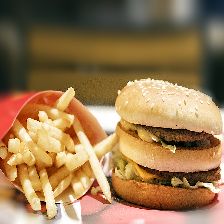

In [ ]:
image_d

In [ ]:
image_array = tf.keras.preprocessing.image.img_to_array(image_d) / 255.0

In [ ]:
image_array.shape

(224, 224, 3)

In [ ]:
output = food_model(image_array[tf.newaxis, ...])

In [ ]:
food_labels = pd.read_csv('https://www.gstatic.com/aihub/tfhub/labelmaps/aiy_food_V1_labelmap.csv', index_col='id')

In [ ]:
np.argsort(-1*output)[0] # Sorting the output from highest to lowest

array([1621,  231,  706, ..., 1329, 1491,  979])

In [ ]:
food_labels.iloc[np.argsort(-1*output)[0]]

,name
id,
1621,Hamburger
231,Cheeseburger
706,Veggie burger
1948,Sandwich
795,Sloppy joe
...,...
1894,Ammonia cookie
673,Chao hong guo
1329,Bonus Jack
